<h1> Coding My Own Neural Network To Predict Test Scores</h1>

Ben Douglass

1/1/17

Big Data

Period 8

In [ ]:
import statistics
import numpy as np
import matplotlib.pylab as plt 
% matplotlib inline 


X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float) 

#Scale the data

X = X/np.amax(X, axis=0)
y = y/100


class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters, establish the structure and behavior of network
        #Self function makes code assessible to entire class
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (Parameters) - how the inputs are affected, plugging into an equations
        self.W1 = np.random.randn(self.inputLayerSize, \
                                 self.hiddenLayerSize) 
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                 self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs through network 
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activaiton function 
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of Sigmoid Function 
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    #Helps Functions for interacting with other classes
    def getParams(self):
        #Get W1 and W2 uncrolled into vector 
        params = np.concatenate((self.W1.ravel(), self.W2.ravel())
)
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    


The goal of this code is to have inputs for the number of hours I slept and the number of hours I studied, and make a predictive output of how I am most likely to score on the test. I will do a supervised regression problem by creating two two-dimensional numpy arrays with example data to train a model, so that based off the two inputs it will be able to predict my test score.

I need to account for the difference in units for the input and output. The input is in hours, and the output is a percent between 0 and 100. To scale this data so the mismatching units don't mess up the output, I can divide each number by the maximum value for that number. Specifically, I am dividing the input umber of hours by the maximum number of hours in that specific input (for example, the maximum number of hours I slept is 10, so I would divide all the number of hours slept by 10), and I would divide the test score by 100 because this is the maximum score I could get. 

Then, I am building an Artificial Neural Network, which takes the two inputs, puts them through a layer of an algorithm, and then gives me an output. The "init" method is used to instantiate constants and variables, and each of the constants and variables will be accessible to the entire class by writing "self." before their names. There is a constant that I define for each layer of the Artificial Neural Network: inputLayerSize is 2 variables, outputLayerSize is 1 output, and hiddenLayerSize has 3 parts to the algorithm. 

A method called "forward" is used to move the data through the layers of the Artificial Neural Network. This is done with matrices rather than one at a time, which is much more efficient (the input, X, is a 3x2 matrix, and the output, the y prediction, is a 3x1 matrix). How it works is the "synapses" that connect the inputs to the layer of algorithms multiply the input matrices that are distributed to each part of the middle layer, to get a 3x3 matrix. 

Once I get this matrix in the middle layer, I multiply it by the activation function. In the code I multiply the data by a function called "sigmoid". 

I will then get the output by multiplying all the input functions by the "weight" of the synapses that connect from the middle layer to the output. To do this, I will first initialize the weight matrices of the final connecting synapses to the output within the "init" method. Then, I will implement forward propogation in a method called "forward", and within that I can use the "." method for matrix multiplication. And at this point, the class is capable of estimating your test score, the output, based off the inputs of hours of sleep and hours studying. 

I then want to take the derivative of sigmoid so I can tell what the slope is to go in the directoin of the minimum value to be used as the final weight. This is called "gradient descent". I want to find the minimum value because I want the estimation of y to be as close to real y value as possible. When I subtract yhat from y, I want it to be a low number. The derivative of the function "sigmoid" is a new function called "sigmoidPrime".

To calculate the costs for each example, I used a function called "costFunction". This determines the cost of error for the predictive model on the weights. Thus telling us how innaccurate or accurate the prediction is. (doc: Andrew)

To make costFunction more accurate, I am taking the derivative of it. This is similar to why I am taking the derivative of sigmoid: to figure out which direction the values go down. This is because I want the values to be lower so they are more accurate. I am taking into account each of the three parts of the middle layer that will be multiplied by the weight. This is called "batch gradient descent".  

At the end of the end of the code I use "getParams", "setParams", and "computerGradient" to test my math. 


In [ ]:
import time 

weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

plt.plot(weightsToTry, costs)
plt.ylabel('Costs')
plt.xlabel('Weights') 


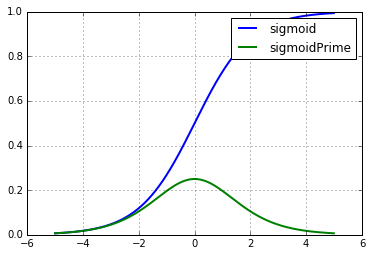

In [26]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth = 2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [22]:
NN = Neural_Network()

In [19]:
def sigmoid(z):
    #Apply sigmoid activation function 
    return 1/(1+np.exp(-z))

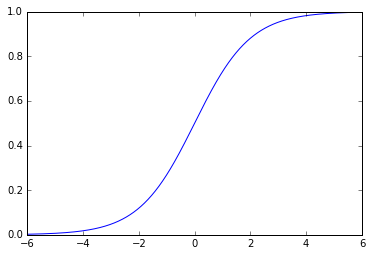

In [20]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth=1)

In [21]:
sigmoid(1)
sigmoid(np.array([-1,0,1]))
sigmoid(np.random.randn(3,3))

array([[ 0.49216055,  0.2968695 ,  0.14064194],
       [ 0.57203311,  0.34514241,  0.5024091 ],
       [ 0.13372622,  0.88125113,  0.55566182]])

In [23]:
yHat = NN.forward(X)
print(yHat)
y

[[ 0.59520989]
 [ 0.79954163]
 [ 0.79412568]]


array([[ 75.],
       [ 82.],
       [ 93.]])

This shows our estimations of the output based off the class earlier.

In [24]:
print(X.shape, y.shape)

(3, 2) (3, 1)


This shows the shape of the matrix variables X and y, which are the input and output respectively. 

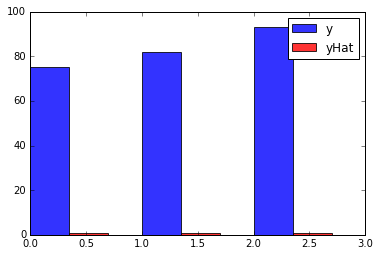

In [25]:
#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y, width = 0.35, alpha=0.8)
plt.bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
plt.legend(['y', 'yHat'])